<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/Combination_MA_RSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#importing required libraries
hdfc=pd.read_csv('/content/HDFCBANK.NS.csv')
print(hdfc.shape)

hdfc.index = hdfc["Date"].apply(lambda x: pd.Timestamp(x))
hdfc.drop("Date", axis=1, inplace=True)

hdfc.tail()

(246, 7)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424
2019-03-27,1159.275024,1164.025024,1139.525024,1149.724976,1140.085938,6942650
2019-03-28,1149.400024,1162.500000,1143.925049,1151.400024,1141.746826,9777164


In [ ]:
!pip install yfinance
!pip install ta

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
os.chdir('../')
!pip install TA-Lib

In [3]:
# Import talib
import yfinance as yf
import talib

In [15]:
def rsi(df, periods = 14, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Adj Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    df["rsi"] = rsi
    return rsi

In [27]:
hdfc['200MA'] = hdfc["Adj Close"].rolling(window = 14).mean()
rsi(hdfc)

hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,200MA,rsi
Date,,,,,,,,
2018-04-02,945.250000,967.875000,945.250000,965.599976,951.427673,2298184,NaN,NaN
2018-04-03,961.974976,962.849976,955.500000,957.950012,943.889954,2039942,NaN,NaN
2018-04-04,956.474976,962.474976,939.224976,941.625000,927.804565,1857054,NaN,NaN
2018-04-05,950.650024,957.000000,945.099976,954.450012,940.441345,2429446,NaN,NaN
2018-04-06,956.099976,963.224976,952.900024,961.700012,947.584900,1860004,NaN,NaN


In [28]:
hdfc = hdfc.iloc[14:, :]
hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,200MA,rsi
Date,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,61.029942
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,51.696503
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,51.381466
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,45.685944
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,49.689767


In [100]:
hdfc["Condition"] = 0
for index,row in hdfc.iterrows():
  if row["Adj Close"]>row["200MA"] and row["rsi"]<50:  
    hdfc.at[index,"Condition"] = 1
  elif row["Adj Close"]<row["200MA"] and row["rsi"]>50:  
    hdfc.at[index,"Condition"] = -1
  else :
    hdfc.at[index,"Condition"] = 0

hdfc

,Open,High,Low,Close,Adj Close,Volume,200MA,rsi,Connection,Condition,No_of_stocks
Date,,,,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,61.029942,0,0,0
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,51.696503,0,0,0
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,51.381466,0,0,0
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,45.685944,0,0,0
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,49.689767,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-22,1150.000000,1153.500000,1135.400024,1138.074951,1128.533447,15201940,1085.731131,72.279103,0,0,0
2019-03-25,1130.000000,1143.925049,1126.500000,1140.650024,1131.087036,4599630,1092.741507,72.880380,0,0,0
2019-03-26,1137.949951,1157.500000,1136.300049,1155.675049,1145.985962,5893424,1099.974993,76.133136,0,0,0


In [101]:
import math
initial_amt = 5000
current_amt = 5000
hdfc["No_of_stocks"] = 0
prev_no_of_stock = 0

for index,row in hdfc.iterrows():
  if row["Condition"] == 1:
    if current_amt > row["Adj Close"]:
      hdfc.at[index,"No_of_stocks"] = math.floor(current_amt/row["Adj Close"])
      prev_no_of_stock = hdfc.at[index,"No_of_stocks"]
      current_amt = current_amt - (hdfc.at[index,"No_of_stocks"]*hdfc.at[index,"Adj Close"])
      print(current_amt)

    else:
      row["No_of_stocks"] = prev_no_of_stock

  elif row["Condition"] == -1:
    if prev_no_of_stock > 0:
      current_amt = current_amt + (prev_no_of_stock*hdfc.at[index,"Adj Close"])
      print(current_amt)
      hdfc.at[index,"No_of_stocks"] = 0
      prev_no_of_stock = 0

    else:
      row["No_of_stocks"] = 0

  else:
    hdfc.at[index,"No_of_stocks"] = prev_no_of_stock


print(current_amt)

26.920774999999594
5132.628479999999
966.5518199999997
5152.460512
5152.460512


In [102]:
hdfc.head()

,Open,High,Low,Close,Adj Close,Volume,200MA,rsi,Connection,Condition,No_of_stocks
Date,,,,,,,,,,,
2018-04-20,970.500000,980.500000,966.075012,977.950012,963.596436,4680690,949.502760,61.029942,0,0,0
2018-04-23,989.500000,989.500000,930.150024,967.875000,953.669312,7652310,950.201285,51.696503,0,0,0
2018-04-24,967.500000,974.025024,963.000000,967.500000,953.299744,2518708,952.022369,51.381466,0,0,0
2018-04-25,963.950012,969.000000,956.000000,960.375000,946.279358,2010296,952.439370,45.685944,0,0,0
2018-04-26,958.400024,969.599976,955.625000,965.125000,950.959595,3923740,952.680420,49.689767,0,0,0


In [105]:
startidx = 0
endidx = len(hdfc)
      
dates = hdfc.index
close = hdfc['Adj Close']
stocks = hdfc["No_of_stocks"]
condition = hdfc["Condition"]

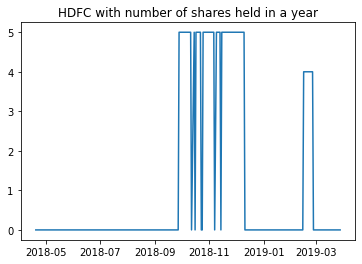

In [107]:
plt.title("HDFC with number of shares held in a year")
plt.plot(dates,stocks)
plt.show()

In [113]:
print("Total profit made = Rs " ,(current_amt - initial_amt))
print("Percentage of profit = ",((current_amt-initial_amt)/initial_amt)*100, "%" )

Total profit made = Rs  152.46051199999965
Percentage of profit =  3.0492102399999927 %
